# Carga y lectura de datos
### Divide aleatoriamente el conjunto de datos de cáncer de seno de Wisconsin en un subconjunto de entrenamiento con el 60 % de los datos, un subconjunto de validación con el 20 % y un subconjunto de prueba con el 20 % restante usando 0 como semilla para tu generador de números aleatorios. Este conjunto de datos contiene 699 registros de tumores de seno, de los cuales 458 son benignos y 241 son malignos. Cada registro consta de los siguientes atributos:

In [29]:
import pandas as pd
import random
import math
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

#####This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 

1. Title: Wisconsin Breast Cancer Database (January 8, 1991)

3. Past Usage:

   Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.



4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     Group 1: 367 instances (January 1989)
     Group 2:  70 instances (October 1989)
     Group 3:  31 instances (February 1990)
     Group 4:  17 instances (April 1990)
     Group 5:  48 instances (August 1990)
     Group 6:  49 instances (Updated January 1991)
     Group 7:  31 instances (June 1991)
     Group 8:  86 instances (November 1991)
     -----------------------------------------
     Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:

   #####  Group 1 : 367 points: 200B 167M (January 1989)
   #####  Revised Jan 10, 1991: Replaced zero bare nuclei in 1080185 & 1187805
   #####  Revised Nov 22,1991: Removed 765878,4,5,9,7,10,10,10,3,8,1 no record
   #####                  : Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial
   #####                  : Changed 0 to 1 in field 6 of sample 1219406
   #####                  : Changed 0 to 1 in field 8 of following sample:
   #####                  : 1182404,2,3,1,1,1,2,0,1,1,1

5. Number of Instances: 699 (as of 15 July 1992)

6. Number of Attributes: 10 plus the class attribute

7. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%) 

In [30]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(url, sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Renombramos de acuerdo a la tabla

In [31]:

#   #  Attribute                     Domain
#   -- -----------------------------------------
#   1. Sample code number            id number
#   2. Clump Thickness               1 - 10
#   3. Uniformity of Cell Size       1 - 10
#   4. Uniformity of Cell Shape      1 - 10
#   5. Marginal Adhesion             1 - 10
#   6. Single Epithelial Cell Size   1 - 10
#   7. Bare Nuclei                   1 - 10
#   8. Bland Chromatin               1 - 10
#   9. Normal Nucleoli               1 - 10
#  10. Mitoses                       1 - 10
#  11. Class:                        (2 for benign, 4 for malignant)

headers = {0 : 'id', 1 : 'Clump Thickness', 2 : 'Uniformity of Cell Size', 3 : 'Uniformity of Cell Shape', 
           4 : 'Marginal Adhesion', 5 : 'Single Epithelial Cell Size', 6 : 'Bare Nuclei', 7 : 'Bland Chromatin', 
           8 : 'Normal Nucleoli', 9 : 'Mitoses', 10 : 'Class'}

df.rename(columns = headers, inplace=True) 
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Reemplazamos los valores ?

In [32]:
df_full =  df
df = df.drop(df[df['Bare Nuclei'] == '?'].index) # Dataframe sin registros con valores no específicados
df = df.astype(int)

### Entrena distintos clasificadores de tumores de seno y evalúalos tanto con el subconjunto de entrenamiento como con el subconjunto de validación y discute su desempeño. Existen 16 registros en el conjunto de datos con un atributo no especificado. Investiga estrategias para rellenar los datos faltantes, utiliza las que consideres más adecuadas para este problema y discute el impacto en el desempeño del clasificador. Reporta el porcentaje de predicciones correctas en el subconjunto de prueba para el clasificador con mejor rendimiento en el subconjunto de validación.

In [33]:
# Dividimos el conjunto de datos en dos de acuerdo a si son benignos y malignos
df_benigno = df[df['Class'] == 2]
df_maligno = df[df['Class'] == 4]
# Contamos la cantidad de observaciones para cada uno de los subconjuntos
n_benigno = len(df_benigno)
n_maligno = len(df_maligno)

print(f'El total de observaciones del conjunto de datos son: {len(df)}')
print(f'La cantidad de tumores marcados como benignos del conjunto de datos es {n_benigno}.')
print(f'La cantidad de tumores marcados como malignos del conjunto de datos es {n_maligno}.')

El total de observaciones del conjunto de datos son: 683
La cantidad de tumores marcados como benignos del conjunto de datos es 444.
La cantidad de tumores marcados como malignos del conjunto de datos es 239.


# Data into train and test 

In [34]:
X = df.loc[:, df.columns != 'Class']
Y = df['Class']
  
# using the train test split function
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                          test_size = 0.2,
                          random_state = 104,
                          train_size = 0.6, shuffle = True)

# X_validacion 
  

In [35]:
# get the validation set
tmp = df[ ~df.index.isin(Y_train.index) ]
tmp2 = tmp[ ~tmp.index.isin(Y_test.index) ]

X_validation = tmp2.loc[:, tmp2.columns != 'Class']
Y_validation = tmp2['Class']

# Naive Bayes
A Naive Bayes Classifier determines the probability that an example belongs to some class, calculating the probability that an event will occur given that some input event has occurred.

When it does this calculation it is assumed that all the predictors of a class have the same effect on the outcome, that the predictors are independent.

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [37]:
def test_classifier(classifier, x_train, y_train, x_test, y_test):
  model = classifier
  model.fit(x_train, y_train)

  y_train_m = np.mean(y_train == model.predict(x_train))
  y_test_m = np.mean(y_test == model.predict(x_test))

  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred,  average="binary", pos_label = 2)
  recall = recall_score(y_test, y_pred, average ="binary", pos_label = 2)

  # print de resultados
  print('\nPerformance para: ', classifier)
  print(f'Para el conjunto de entrenamiento: {y_train_m*100:.2f}%')
  print(f'Para el conjunto de prueba: {y_test_m*100:.2f}%')
  print("Accuracy_score: ", accuracy)
  #print("Precision:", precision)
  #print("Recall:", recall)  
 # return y_train, y_test

In [38]:
to_test =[MultinomialNB(), GaussianNB(), CategoricalNB(), BernoulliNB()]
for i in range(len(to_test)):
  classifier = to_test[i]
  test_classifier(classifier, X_train, Y_train, X_test, Y_test)


Performance para:  MultinomialNB()
Para el conjunto de entrenamiento: 94.87%
Para el conjunto de prueba: 94.16%
Accuracy_score:  0.9416058394160584

Performance para:  GaussianNB()
Para el conjunto de entrenamiento: 87.53%
Para el conjunto de prueba: 91.97%
Accuracy_score:  0.9197080291970803

Performance para:  CategoricalNB()
Para el conjunto de entrenamiento: 97.31%
Para el conjunto de prueba: 97.81%
Accuracy_score:  0.9781021897810219

Performance para:  BernoulliNB()
Para el conjunto de entrenamiento: 66.01%
Para el conjunto de prueba: 64.96%
Accuracy_score:  0.6496350364963503


# K-Nearest Neighbors
K-Nearest Neighbors operates by checking the distance from some test example to the known values of some training example. The group of data points/class that would give the smallest distance between the training points and the testing point is the class that is selected.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors = 5)
test_classifier(KNN_model, X_train, Y_train, X_test, Y_test)

# we will to test the model whit different n_neighbors
evaluation_train = [None] * 11
evaluation_test = [None] * 11
for i in range(1, 11):
  KNN_model = KNeighborsClassifier(n_neighbors = i)
  test_classifier( KNN_model, X_train, Y_train, X_test, Y_test)


Performance para:  KNeighborsClassifier()
Para el conjunto de entrenamiento: 75.31%
Para el conjunto de prueba: 56.93%
Accuracy_score:  0.5693430656934306

Performance para:  KNeighborsClassifier(n_neighbors=1)
Para el conjunto de entrenamiento: 100.00%
Para el conjunto de prueba: 62.04%
Accuracy_score:  0.6204379562043796

Performance para:  KNeighborsClassifier(n_neighbors=2)
Para el conjunto de entrenamiento: 78.00%
Para el conjunto de prueba: 64.23%
Accuracy_score:  0.6423357664233577

Performance para:  KNeighborsClassifier(n_neighbors=3)
Para el conjunto de entrenamiento: 79.95%
Para el conjunto de prueba: 56.20%
Accuracy_score:  0.5620437956204379

Performance para:  KNeighborsClassifier(n_neighbors=4)
Para el conjunto de entrenamiento: 75.55%
Para el conjunto de prueba: 61.31%
Accuracy_score:  0.6131386861313869

Performance para:  KNeighborsClassifier()
Para el conjunto de entrenamiento: 75.31%
Para el conjunto de prueba: 56.93%
Accuracy_score:  0.5693430656934306

Performanc

We select a range of values for *k* and create an empty list to store our results. We use cross-validation to find the accuracy scores, which means we don’t need to create a training and test split. We then loop over the values and add the scores to our list.

To implement cross-validation, we use scikit-learn’s cross_val_score. We pass an instance of the kNN model, along with our data and a number of splits to make. In the code below, we use five splits which means the model with split the data into five equal-sized groups and use 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which we average to find the best model.



In [41]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1, 15)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X, Y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

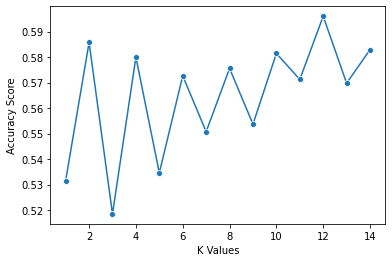

In [42]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Logistic Regression
Logistic Regression outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.

Each of the features also has a label of only 0 or 1. Logistic regression is a linear classifier and therefore used when there is some sort of linear relationship between the data.

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logisticRegr = LogisticRegression()
test_classifier(logisticRegr, X_train, Y_train, X_test, Y_test)


Performance para:  LogisticRegression()
Para el conjunto de entrenamiento: 66.01%
Para el conjunto de prueba: 64.96%
Accuracy_score:  0.6496350364963503


#Decision Trees
A Decision Tree Classifier functions by breaking down a dataset into smaller and smaller subsets based on different criteria. Different sorting criteria will be used to divide the dataset, with the number of examples getting smaller with every division.

Once the network has divided the data down to one example, the example will be put into a class that corresponds to a key. When multiple random forest classifiers are linked together they are called Random Forest Classifiers.

In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
clf = DecisionTreeClassifier()
test_classifier(clf, X_train, Y_train, X_test, Y_test)


Performance para:  DecisionTreeClassifier()
Para el conjunto de entrenamiento: 100.00%
Para el conjunto de prueba: 94.89%
Accuracy_score:  0.948905109489051


# Support Vector Machines
Support Vector Machines work by drawing a line between the different clusters of data points to group them into classes. Points on one side of the line will be one class and points on the other side belong to another class.

The classifier will try to maximize the distance between the line it draws and the points on either side of it, to increase its confidence in which points belong to which class. When the testing points are plotted, the side of the line they fall on is the class they are put in.

In [47]:
from sklearn.svm import SVC

In [48]:
SVC_model = SVC()
SVC_model.fit(X_train, Y_train)

SVC()

In [49]:
test_classifier(SVC_model, X_train, Y_train, X_test, Y_test)


Performance para:  SVC()
Para el conjunto de entrenamiento: 66.01%
Para el conjunto de prueba: 64.96%
Accuracy_score:  0.6496350364963503


# Datos faltantes
Instead of removing the records or columns you can always fill in the missing values and Python offers flexible tools to do it.



## ffill strategy
Let’s first use ffill strategy to fill all the NaNs with the preceding or last non-null value.

In [50]:
df_full[df_full['Bare Nuclei'] == '?']
# replace ? with nan values 
df_full['Bare Nuclei'] = df_full['Bare Nuclei'].replace(['?'], [np.nan])
df2 = df_full.fillna(method='ffill')
df2 = df2.astype(int)

In [51]:
X_2 = df2.loc[:, df2.columns != 'Class']
Y_2 = df2['Class']
  
# using the train test split function
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, 
                          test_size = 0.2,
                          random_state = 104,
                          train_size = 0.6, shuffle = True)
  

In [52]:
to_test =[MultinomialNB(), GaussianNB(), CategoricalNB(), BernoulliNB(),  DecisionTreeClassifier()]
for i in range(len(to_test)):
  classifier = to_test[i]
  test_classifier(classifier, X_train_2, Y_train_2, X_test_2, Y_test_2)


Performance para:  MultinomialNB()
Para el conjunto de entrenamiento: 93.32%
Para el conjunto de prueba: 95.00%
Accuracy_score:  0.95

Performance para:  GaussianNB()
Para el conjunto de entrenamiento: 86.87%
Para el conjunto de prueba: 92.14%
Accuracy_score:  0.9214285714285714

Performance para:  CategoricalNB()
Para el conjunto de entrenamiento: 97.61%
Para el conjunto de prueba: 96.43%
Accuracy_score:  0.9642857142857143

Performance para:  BernoulliNB()
Para el conjunto de entrenamiento: 65.39%
Para el conjunto de prueba: 67.14%
Accuracy_score:  0.6714285714285714

Performance para:  DecisionTreeClassifier()
Para el conjunto de entrenamiento: 100.00%
Para el conjunto de prueba: 92.86%
Accuracy_score:  0.9285714285714286


## Mean strategy
Now, we will to replace de nan values with the mean of the column

In [53]:
# replace nan values with mean
values = df['Bare Nuclei'].mean()
df3 = df_full.fillna(value = values)
df3 = df3.astype(int)

In [54]:
X_3 = df3.loc[:, df3.columns != 'Class']
Y_3 = df3['Class']
  
# using the train test split function
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, 
                          test_size = 0.2,
                          random_state = 104,
                          train_size = 0.6, shuffle = True)

to_test =[CategoricalNB(), MultinomialNB(), GaussianNB(), BernoulliNB(),  DecisionTreeClassifier()]
for i in range(len(to_test)):
  classifier = to_test[i]
  test_classifier(classifier, X_train_3, Y_train_3, X_test_3, Y_test_3)  


Performance para:  CategoricalNB()
Para el conjunto de entrenamiento: 97.61%
Para el conjunto de prueba: 96.43%
Accuracy_score:  0.9642857142857143

Performance para:  MultinomialNB()
Para el conjunto de entrenamiento: 93.79%
Para el conjunto de prueba: 95.00%
Accuracy_score:  0.95

Performance para:  GaussianNB()
Para el conjunto de entrenamiento: 86.87%
Para el conjunto de prueba: 92.14%
Accuracy_score:  0.9214285714285714

Performance para:  BernoulliNB()
Para el conjunto de entrenamiento: 65.39%
Para el conjunto de prueba: 67.14%
Accuracy_score:  0.6714285714285714

Performance para:  DecisionTreeClassifier()
Para el conjunto de entrenamiento: 100.00%
Para el conjunto de prueba: 91.43%
Accuracy_score:  0.9142857142857143


## Mode strategy
Now, we will to replace de nan values with the mean of the column

In [55]:
# replace nan values with mean
values = int(df['Bare Nuclei'].mode())
df4 = df_full.fillna(value = values)
df4 = df4.astype(int)

X_4 = df4.loc[:, df4.columns != 'Class']
Y_4 = df4['Class']
  
# using the train test split function
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_4, Y_4, 
                          test_size = 0.2,
                          random_state = 104,
                          train_size = 0.6, shuffle = True)

to_test =[CategoricalNB(), MultinomialNB(), GaussianNB(), BernoulliNB(),  DecisionTreeClassifier()]
for i in range(len(to_test)):
  classifier = to_test[i]
  test_classifier(classifier, X_train_4, Y_train_4, X_test_4, Y_test_4)  


Performance para:  CategoricalNB()
Para el conjunto de entrenamiento: 97.61%
Para el conjunto de prueba: 96.43%
Accuracy_score:  0.9642857142857143

Performance para:  MultinomialNB()
Para el conjunto de entrenamiento: 93.32%
Para el conjunto de prueba: 95.00%
Accuracy_score:  0.95

Performance para:  GaussianNB()
Para el conjunto de entrenamiento: 86.87%
Para el conjunto de prueba: 92.14%
Accuracy_score:  0.9214285714285714

Performance para:  BernoulliNB()
Para el conjunto de entrenamiento: 65.39%
Para el conjunto de prueba: 67.14%
Accuracy_score:  0.6714285714285714

Performance para:  DecisionTreeClassifier()
Para el conjunto de entrenamiento: 100.00%
Para el conjunto de prueba: 94.29%
Accuracy_score:  0.9428571428571428


# Resultados
### Mejor clasificador
Entrenamos usando diferentes clasificadores: Clasificador bayersiano ingenuo para diferentes distribuciones, k-vecinos, regresión logistica, árboles de descición y maquina de soporte vectorial. Todo esto después de haber eliminado los renglones que contenían un atributo incierto (?). Se obtuvieron mejores resultados para 

Performance para:  MultinomialNB()\
Accuracy_score:  0.9124087591240876
\
\
Performance para:  CategoricalNB()\
Accuracy_score:  0.9708029197080292
\
\
Performance para:  DecisionTreeClassifier()\
Accuracy_score:  0.9562043795620438


- Mejor estrategia to fill ? 
Posteriormente se utilizaron estrategias para rellenar los valores con valores inciertos ?. Se evaluaron nuevamente y se reporta lo siguiente:

fill
Performance para:  CategoricalNB()\
Accuracy_score:  0.9642857142857143
\
\
Moda
Performance para:  CategoricalNB()\
Accuracy_score:  0.9642857142857143
\
\
Mean
Performance para:  CategoricalNB()
Accuracy_score:  0.9642857142857143
\
\
De manera que el mejor desempeño es para el clasificador bayesiano ingenuo con distribución categorica. Por otro lado, las estrategias para reemplazar los datos faltantes no mejora significativamente el desempeño del clasificador, eso debe ser porque únicamente son 16 datos los que presentan el simbolo ?. En un data ser donde este tipo de datos se presente en mayor cantidad, usar estas estrategias de llenado podrían mejorar el desempeño de los modelos. 

# Reporta el porcentaje de predicciones correctas en el subconjunto de prueba para el clasificador con mejor rendimiento en el subconjunto de validación.

In [56]:
test_classifier(CategoricalNB(), X_train, Y_train, X_validation, Y_validation)


Performance para:  CategoricalNB()
Para el conjunto de entrenamiento: 97.31%
Para el conjunto de prueba: 97.81%
Accuracy_score:  0.9781021897810219


El mejor clasificador fue el clasificador bayesiano ingenuo con distribución categorica con un Accuracy_score: 97.31% en el conjunto de validación.